# Intro to DNN Using TensorFlow (Shallow Neural Networks)

`pip install keras`

## TensorFlow with Keras
- TensorFlow
  - It is the main framework (developed and supported by Google)
  - It provides a flexible and scalable platform for building and training machine learning and deep learning models (mainly neural nets)
  - It enables distributed training across CPUs, TPUs, and GPUs.
  - Complex syntax and suitable for advanced users.
- Keras
  - It is a high-level deep learning API designed for rapid prototyping.
  - Originally it was its own dependent library. Today, it was merged with TensorFlow `tf.keras` as it became TF's official high-level interface.
  - It offers user-friendly and intuitive methods and syntax.
  - It's modular and Composable

- **TensorFlow** provides the computational backbone and **Keras** offers a simplified way to build NN models.


In [11]:
import tensorflow as tf #will be used for activation functions
from tensorflow.keras import models, layers #allow us to build our model and its components as layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


- The MNIST data comes in 2D format (we previously used already flattened format)
- We need to flatten the dataset to use a traditional DNN

![fl](https://testerstories.com/files/ai_and_ml/ml-mnist-2d-to-1d.png)

## Step 1: Loading and Splitting The Data 

- You can either flatten the data before training
- OR keras has a flattening layer to process the data

In [12]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [13]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
X_train.min(), X_train.max()

(0, 255)

In [15]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
X_test.shape[0]/(X_test.shape[0]+X_train.shape[0])

0.14285714285714285

In [17]:
X_train.nbytes/1000000

47.04

- Just like in traditional ML, scaling is recommended (normalization and standardization). When it comes to Deep Learning, using MinMaxScaler (range 0 to 1) is specifically recommended.
- Potential advantages (hihg probability):
    - Improving Model Performance: since we have a range between 0 and 1, it reduces the impact of dominant features (better accuracy).
    - Faster Convergence and Error Reduction: during training the optimizer (e.g. Adam or Gradient Descent) runs smoother and can find the optimal weights faster.
    - Reduced Overfitting: it allows the model to generalize better.
    - Handling Outliers
- Methods:
  - `MinMaxScaler()` from `sklearn`
  - `layers.Rescaling` from `keras`
  - For B/W or RGB images, divide by 255
- Previous trials of this problem proved that the performance went from 94.5% to 98.9% and the execution time took 30% less 

In [18]:
X_train.min(), X_train.max()

(0, 255)

In [19]:
X_train, X_test = X_train/255.0, X_test/255.0 #using decimal value preserves the float format

In [20]:
X_train.min(), X_train.max()

(0.0, 1.0)

## Step 2: Building The Neural Network Model

- In this stage, we make a decision about the architecture of our Neural Network and the components that will be used.
- For this exercise, we'll be using `Sequential` technique to assemple the following:
  - First Layer: 
    - input - shape (28,28)
    - flatten 
  - Second Layer: (Hidden)
    - custom number of neurons e.g. 128
    - activation: ReLU
  - Third Layer: (Output)
    - 10 output neurons 

In [ ]:
nn_model = models.Sequential([
                #first layer
                layers.Input(shape=(28,28)),
                layers.Flatten(),
                #second layer
                layers.Dense(128, activation='relu'),
                #third layer
                layers.Dense(10) # in this step you can either include the activation function to get the final output or use it later
                        ])

In [22]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
784 * 128 + 128

100480

- The summary is useful to get info about the architecture and num of layers and neurons.
- The first number  is the input (num of pixels)
- Second row shows 100,480 parameters = (784 Inp neurons x 128 HL neurons) weight count + 128 biases. Or 100,352 weights + 128 biases
- Third row 1,290 = 128 * 10 + 10

## Step 3: Defining The Loss Function And The Optimizer

- The loss function measures the difference between predicted outputs and actual outputs
- We have different types:
    - Regression - metrics:
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
    - Classification:
        - Metric: Accuracy, f1 score, precision, etc...
        - In addition, we have to apply cross entropy:
        - **Binary** BinaryCrossEntropy
        - **Multi-Class** CategoricalCrossEntropy
            - If the target is OneHotEncoded: `CategoricalCrossentropy` **less common**
            - If the target is not OneHotEncoded: `SparseCategoricalCrossentropy`
  - For our exercise we go with `SparseCategoricalCrossentropy`
- Since we have 10 categories, we need to use `SparseCategoricalCrossentropy`
- It's always recommended to start with the Adam optimizer because it has been proven it's the best of the best.
> Note 1: Although it was proven that Adam gives the best results, that doesn't mean we should ignore others. We can consider them if the model doesn't perform well. (aka Hyperparameter tuning)

> Note 2: Since we don't have an activation function in the output layer, we need to enable `from_logits` functionality.

In [ ]:
from tensorflow.keras import losses

loss_fn = losses.SparseCategoricalCrossentropy(from_logits=True) #calculate the loss from raw non-activated output

In [ ]:
opt_algo = 'adam' #telling keras to use the default hyperparameter 

## Step 4: Compile The Model

Compiling the model simply attaches the loss func, optimizer, and loss measurement into the main model.

In [26]:
nn_model.compile(optimizer=opt_algo,
                 loss=loss_fn,
                 metrics=['accuracy']
                 )

In [27]:
epoch_num = 6
#we define the fit as an object to preserve the training log history
model_history = nn_model.fit(X_train,
                             y_train,
                             validation_split=0.2,
                             epochs=epoch_num
                                )

Epoch 1/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8647 - loss: 0.4729 - val_accuracy: 0.9588 - val_loss: 0.1501
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9613 - loss: 0.1354 - val_accuracy: 0.9667 - val_loss: 0.1145
Epoch 3/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - accuracy: 0.9742 - loss: 0.0886 - val_accuracy: 0.9705 - val_loss: 0.0963
Epoch 4/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9804 - loss: 0.0671 - val_accuracy: 0.9730 - val_loss: 0.0872
Epoch 5/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9853 - loss: 0.0519 - val_accuracy: 0.9737 - val_loss: 0.0920
Epoch 6/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9895 - loss: 0.0372 - val_accuracy: 0.9750 - val_loss: 0.0842


- The model fits the data using 6 epochs (forward and back propagation cycles)
- The optimizer is improving the loss value by adjusting the weights in every cycle
- We can see the accuracy and loss for both train and validation are close. Therefore, we don't see overfitting.

## Step 5: Final Evaluation

In [28]:
nn_model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - 514us/step - accuracy: 0.9752 - loss: 0.0786


[0.0785643458366394, 0.9751999974250793]

**inspection** 
- No Overfitting: if they are close.
- Overfitting: if High train_acc but low test_acc (e.g., train_acc = 99%, test_acc = 85%).


Another way to evaluate a mode, is to plot the history

In [29]:
model_history.history #our log was captured in a dictionary

{'accuracy': [0.9187291860580444,
  0.9628124833106995,
  0.9742916822433472,
  0.9798333048820496,
  0.9850416779518127,
  0.9879583120346069],
 'loss': [0.28575554490089417,
  0.12761613726615906,
  0.08726612478494644,
  0.06646467745304108,
  0.05018693953752518,
  0.0403982475399971],
 'val_accuracy': [0.9587500095367432,
  0.9666666388511658,
  0.9704999923706055,
  0.9729999899864197,
  0.9737499952316284,
  0.9750000238418579],
 'val_loss': [0.15009132027626038,
  0.1144956424832344,
  0.09632029384374619,
  0.08718892186880112,
  0.09202093631029129,
  0.08421403914690018]}

In [30]:
plt.style.use('bmh')

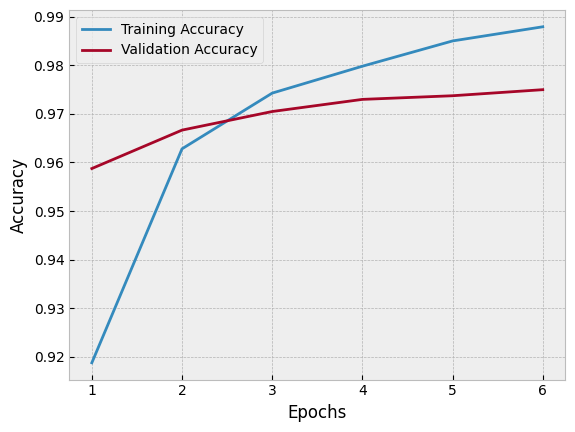

In [31]:
epoch_axis_val = range(1,epoch_num+1)
plt.plot(epoch_axis_val,model_history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epoch_axis_val,model_history.history['val_accuracy'], label = 'Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

- Expected Outputs
    - No overfitting: Both curves move together.
    - Overfitting: Training accuracy ↗ while validation accuracy stagnates/↘
- We can see that a gap starts to form between training and validation, which is an indicator of overfitting emerging
- The difference is not substantial yet. Therefore, epoch of 5 or 6 is  a good number to use.
- Although there's a gap, it's still very small on the y-axis scale
- We can see that epoch = 5 was enough for training. we can go back and adjust for optimization purposes.


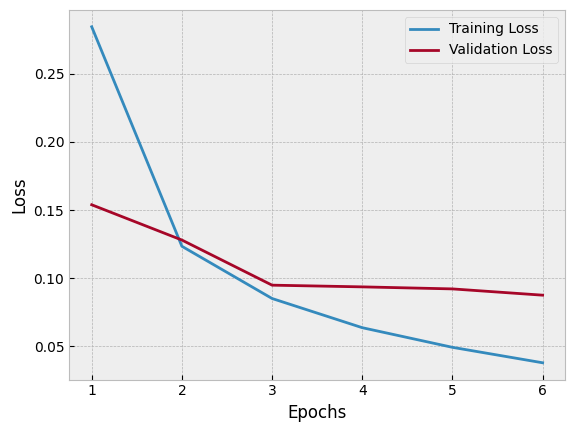

In [20]:
plt.plot(epoch_axis_val,model_history.history['loss'], label = 'Training Loss')
plt.plot(epoch_axis_val,model_history.history['val_loss'], label = 'Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### Confusion Matrix -- _skip_

In [34]:
# Get predicted classes for train and test sets

y_train_pred = tf.argmax(nn_model.predict(X_train), axis=1)
y_test_pred = tf.argmax(nn_model.predict(X_test), axis=1)
y_test_pred[:3]

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 279us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step


<tf.Tensor: shape=(3,), dtype=int64, numpy=array([7, 2, 1])>

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute confusion matrices
cm_train = confusion_matrix(y_train_pred, y_train_pred)
cm_test = confusion_matrix(y_test_pred, y_test_pred)



array([[5917,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6707,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5934,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6081,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5873,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5424,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5928,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6346,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5979,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5811]])

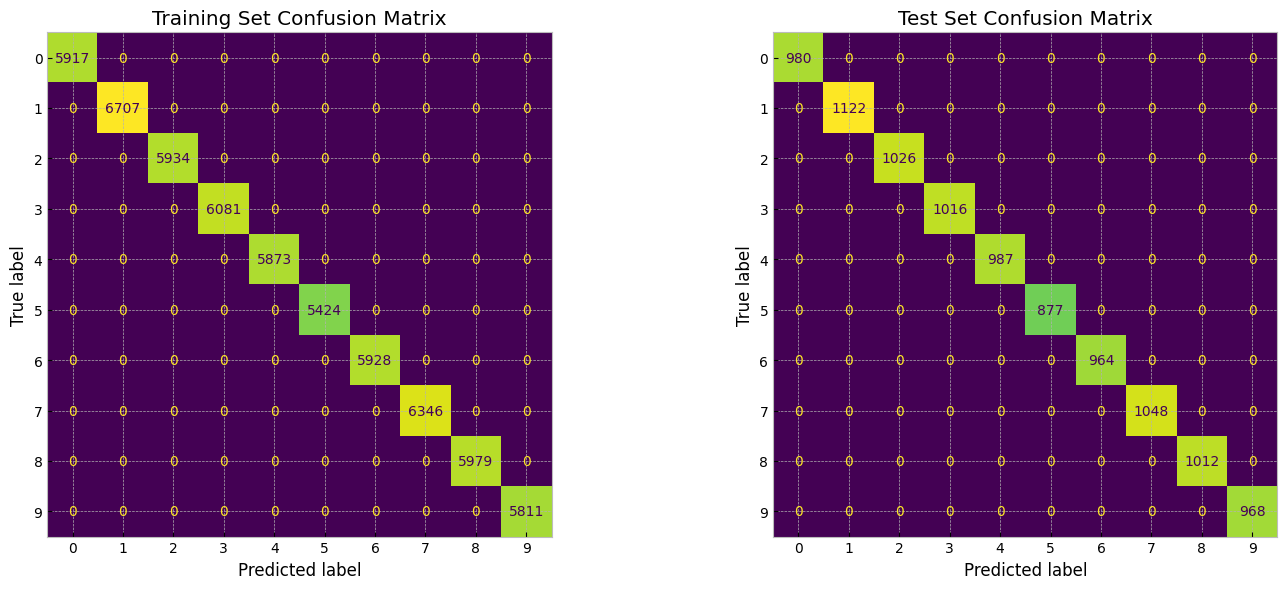

In [44]:

# Plotting
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot training set confusion matrix
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=range(10))
disp_train.plot(ax=ax1, colorbar=False)
ax1.set_title('Training Set Confusion Matrix')

# Plot test set confusion matrix
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=range(10))
disp_test.plot(ax=ax2, colorbar=False)
ax2.set_title('Test Set Confusion Matrix')

plt.tight_layout()

## Optional Step: Visual Evaluation

Make the prediction of the test data

In [21]:
predictions = nn_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


In [22]:
predictions

array([[ -1.7399634 ,  -5.8601985 ,   0.8669182 , ...,  10.518535  ,
         -0.39852262,  -0.61609906],
       [ -9.153426  ,   2.674074  ,  16.732414  , ..., -15.515573  ,
          0.8021705 , -13.161979  ],
       [ -6.9419403 ,   6.3695397 ,  -1.2039734 , ...,  -0.3333345 ,
         -0.41785955,  -5.3199363 ],
       ...,
       [-10.528705  , -10.080422  , -11.354214  , ...,  -1.0815079 ,
          1.7390497 ,   4.7283525 ],
       [ -6.6511726 , -14.241977  , -13.675807  , ..., -10.124811  ,
          4.382739  ,  -9.039262  ],
       [ -2.3525646 , -16.346315  ,  -4.2031727 , ..., -15.586588  ,
         -1.9408879 ,  -9.995685  ]], dtype=float32)

Since we don't have an activation function in the output layer, the output is raw. Therefore, we need to convert it to readable output (10 classes) using `softmax()` and `argmax()` function.

**1. Softmax**  
- **What it does**: Converts raw logits (model outputs) into **probabilities** (range: 0 to 1, sums to 1).  
- **Where to use**: Typically the **last layer** of a classification network.  

**2. Argmax**  
- **What it does**: Returns the **index** of the highest value in a tensor (i.e., the predicted class).  
- **Where to use**: After Softmax, to convert probabilities into discrete class labels.  


**3. Typical Workflow in a Neural Network**  
1. **Model Output**: Raw logits (e.g., `[5.0, -1.0, 2.0]`).  
2. **Softmax**: Converts logits to probabilities (e.g., `[0.95, 0.02, 0.03]`).  
3. **Argmax**: Picks the class with the highest probability (e.g., `0` for class 0).  

**4. Key Notes**  
- **Softmax** is used **during training** to compute loss (e.g., cross-entropy).  
- **Argmax** is used **during inference** to get final class labels.  
- **Don’t use Argmax before Softmax**: Argmax is non-differentiable (breaks backpropagation).  

**5. When to Skip Softmax**
- If you use `loss='sparse_categorical_crossentropy'`, you can omit the Softmax layer because the loss function applies it internally.  
- For binary classification, use `Sigmoid` instead of Softmax.  
- Visual Summary**  
```
Logits → [Softmax] → Probabilities → [Argmax] → Class Label
           (Training)               (Inference)
```


**Optional** observing the first prediction.

In [23]:
first_prediction_prob = tf.math.softmax(predictions[0])
first_prediction_prob

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([4.7415351e-06, 7.7005872e-08, 6.4279637e-05, 5.4923934e-04,
       1.9641046e-11, 2.3484893e-07, 2.0646826e-11, 9.9934870e-01,
       1.8134244e-05, 1.4588375e-05], dtype=float32)>

In [24]:
len(first_prediction_prob)

10

In [87]:
# if you sum up the prob values above
tf.reduce_sum(first_prediction_prob)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0000001>

- You can see the probabilities above for each class.
- They all add to 1

In [88]:
first_prediction_final = tf.math.argmax(first_prediction_prob)
first_prediction_final

<tf.Tensor: shape=(), dtype=int64, numpy=7>

The first prediction is 7

Get the results for all in one shot.

In [25]:
predicted_classes = tf.math.argmax(tf.math.softmax(predictions), axis=1)

In [26]:
predicted_classes[:20]

<tf.Tensor: shape=(20,), dtype=int64, numpy=array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4])>

In [27]:
num_samples = 15
sample_X = X_test[:num_samples]
sample_images = sample_X.reshape(num_samples, 28, 28) 
sample_labels_pred = predicted_classes[:num_samples]


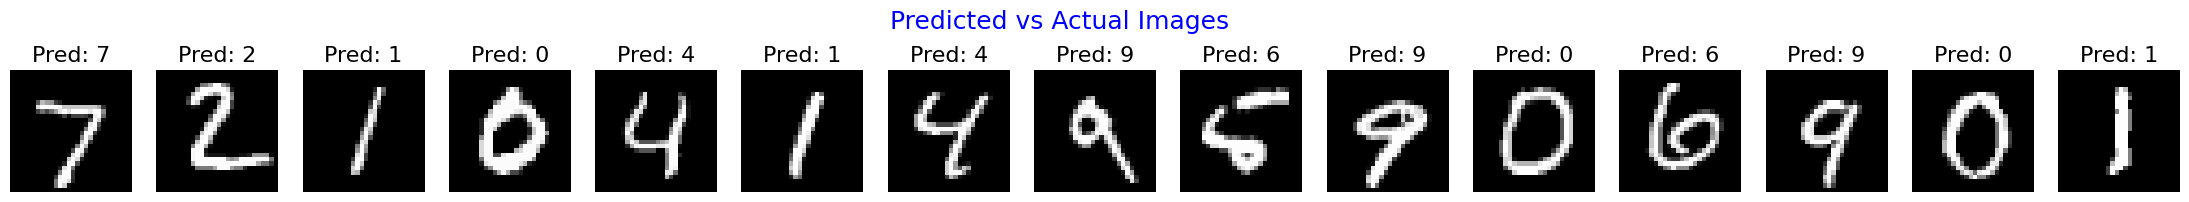

In [28]:
plt.figure(figsize=(28, 3))
plt.suptitle("Predicted vs Actual Images", fontsize=18, color='Blue', y=0.9)


for img in range(num_samples):
    plt.subplot(1, num_samples, img +1)
    plt.imshow(sample_images[img], cmap='gray')
    plt.title(f'Pred: {sample_labels_pred[img]}', fontsize=16)
    plt.axis('off')

Take a look at the labels that did not match (pred vs actual)

In [93]:
predicted_classes != y_test

<tf.Tensor: shape=(10000,), dtype=bool, numpy=array([False, False, False, ..., False, False, False])>

In [94]:
# use the nonzero in numpy to get the values that satisfy the condition above

misclassified_indices = np.nonzero(predicted_classes != y_test)
misclassified_indices # indices of the labels that did not match

(array([ 119,  151,  241,  247,  274,  321,  340,  381,  404,  445,  578,
         582,  583,  613,  619,  628,  659,  684,  707,  720,  740,  846,
         883,  900,  951,  965, 1014, 1039, 1107, 1112, 1114, 1128, 1182,
        1226, 1242, 1247, 1270, 1290, 1299, 1319, 1328, 1356, 1393, 1395,
        1494, 1500, 1522, 1530, 1549, 1551, 1554, 1609, 1621, 1670, 1681,
        1709, 1717, 1721, 1751, 1790, 1828, 1901, 1909, 1952, 1987, 2004,
        2043, 2053, 2073, 2109, 2118, 2130, 2135, 2174, 2182, 2224, 2272,
        2292, 2293, 2299, 2333, 2369, 2387, 2406, 2422, 2433, 2447, 2454,
        2488, 2570, 2607, 2618, 2635, 2648, 2654, 2713, 2771, 2877, 2896,
        2915, 2939, 2953, 3030, 3060, 3073, 3117, 3339, 3405, 3429, 3474,
        3490, 3503, 3520, 3534, 3549, 3558, 3597, 3718, 3796, 3808, 3811,
        3853, 3869, 3876, 3893, 3906, 3926, 3941, 3943, 3946, 4000, 4063,
        4065, 4154, 4163, 4176, 4199, 4201, 4211, 4224, 4248, 4271, 4289,
        4294, 4355, 4439, 4497, 4534, 

In [95]:
len(misclassified_indices[0])

242

665 errors out of 10K

In [96]:
misclassified_indices[0][:15]

array([119, 151, 241, 247, 274, 321, 340, 381, 404, 445, 578, 582, 583,
       613, 619])

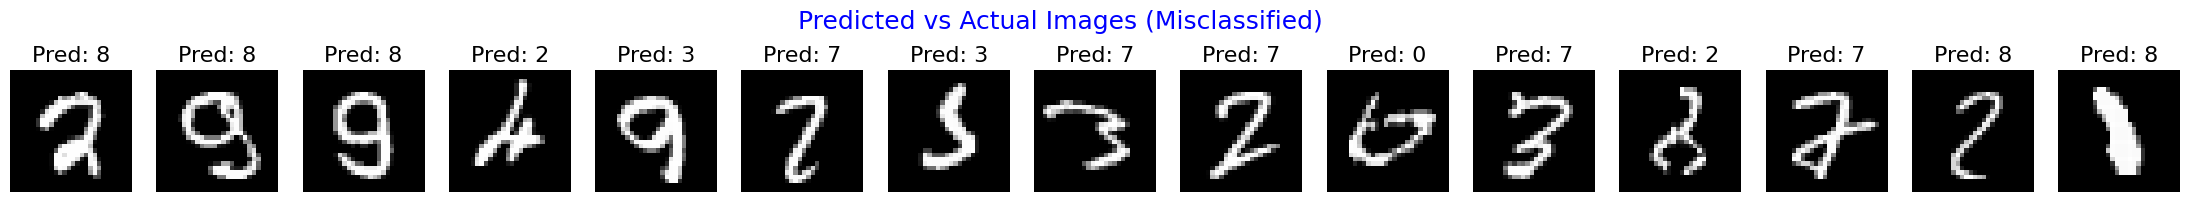

In [97]:
sample_X = X_test[misclassified_indices[0][:15]]
sample_images = sample_X.reshape(num_samples, 28, 28) 
sample_labels_pred = predicted_classes.numpy()[misclassified_indices[0][:15]] #converted to numpy for easier index reference

plt.figure(figsize=(28, 3))
plt.suptitle("Predicted vs Actual Images (Misclassified)", fontsize=18, color='Blue', y=0.9)

for img in range(num_samples):
    plt.subplot(1, num_samples, img +1)
    plt.imshow(sample_images[img], cmap='gray')
    plt.title(f'Pred: {sample_labels_pred[img]}', fontsize=16)
    plt.axis('off')


## Saving and Loading The Model

In [98]:
nn_model.save("nn_model_20241123.keras")

In [99]:
from tensorflow.keras import saving
loaded_model = saving.load_model("nn_model_20241123.keras")